# ***` Logistic Regression `***

***` Import the Iris data which discusses about three species of flowers namely "Setosa","Verisicolor" and "Virginica" Your task is to build a logistic regression model to distinguish between two  of these speicies using features like "Sepal Length", "Sepal Width", "Petal Length" and "Petal Width"`***

`1)Write a sigmoid function and visualize the sigmoid function,by considering x in the range of (-10,10).`

`2)Plot impact of logloss for single forecasts (You can import log_loss from sklearn.metrics). Make predictions as 0 to 1 in 0.01 increments. (For example,yhat = [x*0.01 for x in range(0, 101)]).Evaluate predictions for a 0 true value.Plot a graph between y_hat and log_loss`

`3)Find the difference between minimum log loss for label 0 and label 1 [1.5 marks]`

`3)Import the Iris Data, and visualize the data to an idea about it.`

`4)Convert the char labels to numerical as logistic regression takes only 0's and 1's and then create new array of numerical labels.After following the procedure as mentioned in the comments , find the difference between means of sepal length of speices "Setosa"(label 0) and "Versicolor"(label 1).[1 marks]`

`5)Split the data in X,y and convert them into arrays`

`6)Use sklearn to split the data (**Important** Consider random_state=42 and test_size=0.2)and perform Logistic Regression`

`7)Find the weights and bias and save it in a list[5 marks]`

`8)Make a prediction on the test data.Find the accuracy of the prediction.[1 marks]`

`9)Also predict the species of the flower whose sepal length=4.9cm	sepal width=4cm	petal length=1.2cm	petal width=0.4cm and return the Species of the data.[1.5 marks]`


In [1]:
# Run this cell
# import important libraries library
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import json
%matplotlib inline
ans = [0]*5

# ***`Importing and Visualizing Data`***



In [2]:
#Sigmoid Function
import math
def sigmoid(x):
    return 1/(1+math.exp(-x))

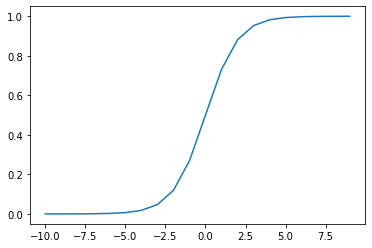

In [3]:
#Visualize sigmoid function
#Create an array of x_val with values between -10 and 10 
x_val = np.arange(-10, 10)

#Find y_val, by using sigmoid function
y_val = [sigmoid(x) for x in x_val]

#Plot x_val,y_val and label the graph
plt.plot(x_val, y_val)
plt.show()

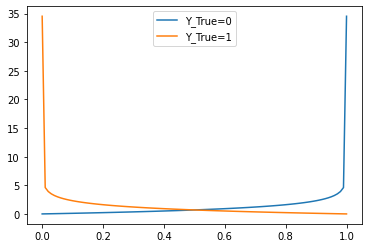

In [4]:
# Plot impact of logloss for single forecasts
from sklearn.metrics import log_loss
# predictions as 0 to 1 in 0.01 increments
y = [x*0.01 for x in range(0, 101)]
# evaluate predictions for a 0 true value
loss_0 = [log_loss([0], [x], labels=[0,1]) for x in y]
# evaluate predictions for a 1 true value
loss_1 = [log_loss([1], [x], labels=[0,1]) for x in y]
# plot input to loss
plt.plot(y, loss_0, label='Y_True=0')
plt.plot(y, loss_1, label='Y_True=1')
plt.legend()
plt.show()

In [5]:
#Find the difference between minimum log loss for label 0 and label 1 
ans[0]=min(loss_0)-min(loss_1)

# ***`Processing the Data`***

In [6]:
#Import the dataset of iris from datasets.load_iris()
data = datasets.load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Species'] = data.target

In [7]:
#Look into the top 5 rows of data
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


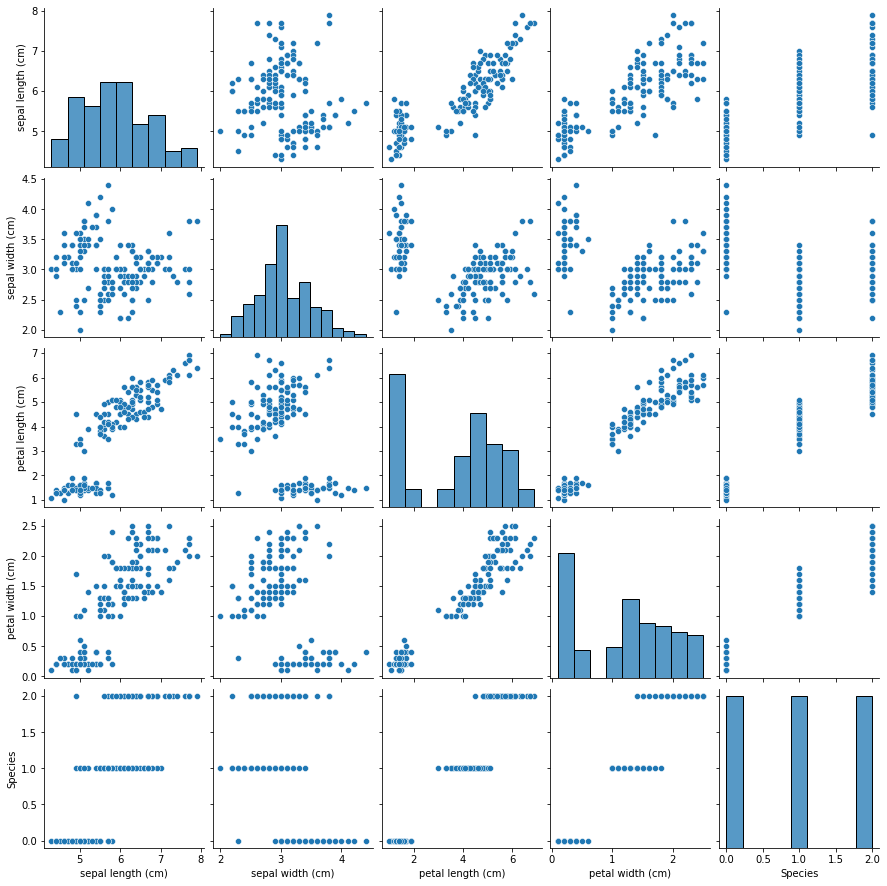

In [8]:
#Visualize  the data using seaborn pairplot
sns.pairplot(df)

In [9]:
# Convert char labels into numerical 
#import LabelEncoder which returns array of encoded labels
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
# Create new array of numerical labels
labelencoder_Species = LabelEncoder()
Species_encoded = labelencoder_Species.fit_transform(df['Species'])

In [10]:
# Drop old labels(char) data 
df.drop(columns='Species',inplace=True)
# Substitute new labels(numerical) into data
df['Species_encoded'] = Species_encoded
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species_encoded
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
# Logistic regression only takes the data which has labels 0 and 1, so consider only data['labels']<2
# Considering Iris-setosa as "0" and Iris-versicolor as "1"
df = df.loc[df.Species_encoded<2]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species_encoded
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [12]:
#Find the difference between means of sepal length of speices "Setosa"(label 0) and "Versicolor"(label 1)
setosa_mean = df.loc[df.Species_encoded==0].mean()
versicolor_mean = df.loc[df.Species_encoded==1].mean()
ans[1]= (setosa_mean - versicolor_mean).loc['sepal length (cm)']

# ***`Obtaining Weight Values`***

In [13]:
# Split the data into X and y
X,y = df.iloc[:,:-1], df.iloc[:,-1]

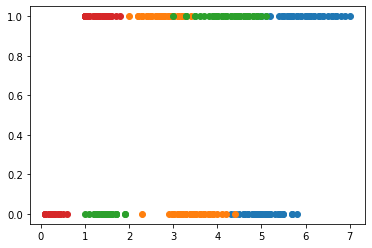

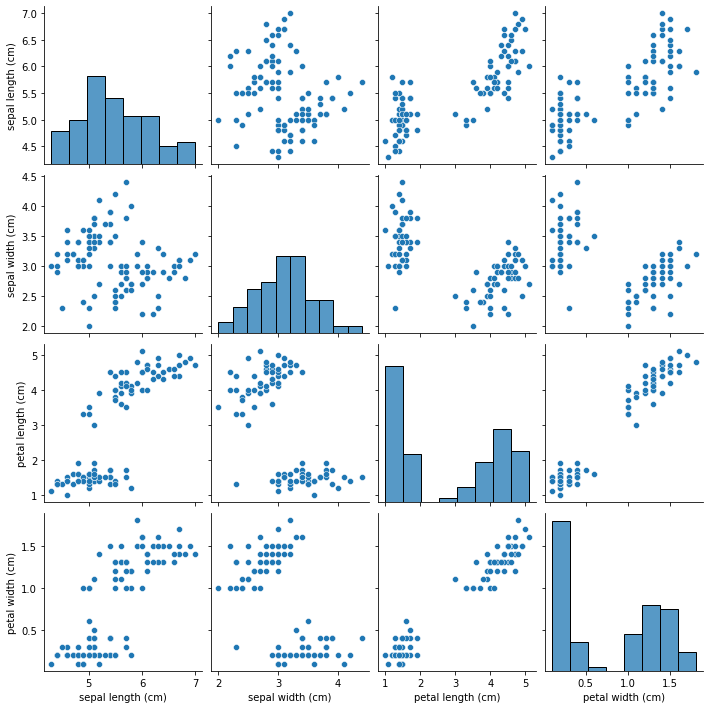

In [14]:
# Visualize X,y
plt.scatter(X.iloc[:,0],y)
plt.scatter(X.iloc[:,1],y)
plt.scatter(X.iloc[:,2],y)
plt.scatter(X.iloc[:,3],y)
sns.pairplot(X)

In [15]:
# Convert X,y into arrays
X = np.array(X)
y = np.array(y)

In [16]:
#Using sklearn to split the data
from sklearn.model_selection import train_test_split
#Take the test size as 0.2 and random_state as 42
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
#Importing Necessary Libraries for Logistic Regression 
from sklearn.linear_model import LogisticRegression
#Building our model
model = LogisticRegression()
model.fit(X_train,y_train)
#Finding the parameter and bias
coeff = model.coef_
bias = model.intercept_

In [18]:
#Printing the parameters and bias
print(f"Coefficients :{coeff}")
print(f"Bias :{bias}")

Coefficients :[[ 0.45808171 -0.83895654  2.21684247  0.92362595]]
Bias :[-6.526665]


In [19]:
#Save parameters and bias [w1,w2,w3,w4,b] as one vector 
#i.e if the answer should be in a 1 dimensional list
an = []
for coef in coeff[0]:
    an.append(coef)

an.append(bias[0])

ans[2]= an

In [20]:
#Predicitng on our test data
pred = model.predict(X_test)

In [21]:
#Finding the accuracy
ans[3]= metrics.accuracy_score(y_test, pred)

In [22]:
#Predict for the input [4.9,4,1.2,0.4] , save the answer ans[4] "Setosa" or "Versicolor"
pred_indi = model.predict([[4.9, 4, 1.2, 0.4]])

In [23]:
#The class of the input 
ans[4]= "Setosa"

In [24]:
ans

[0.0,
 -0.9300000000000006,
 [0.45808171067944053,
  -0.8389565384015345,
  2.2168424707599437,
  0.9236259535228264,
  -6.5266650038990734],
 1.0,
 'Setosa']

In [25]:
import json
ans = [str(item) for item in ans]

filename = "riya21april@gmail.com_Maitri_Das_LogisticRegression"

# Eg if your name is Saurav Joshi and email id is sauravjoshi123@gmail.com, filename becomes
# filename = sauravjoshi123@gmail.com_Saurav_Joshi_LogisticRegression

## Do not change anything below!!
- Make sure you have changed the above variable "filename" with the correct value. Do not change anything below!!

In [27]:
from importlib import import_module
import os
from pprint import pprint

findScore = import_module('findScore')
response = findScore.main(ans)
response['details'] = filename
with open(f'evaluation_{filename}.json', 'w') as outfile:
    json.dump(response, outfile)
pprint(response)

{'Comments': 'Please make sure the Python script you are submitting is not '
             'having errors. Try running before submitting',
 'Message': 'Successfully submitted! Thanks for taking the exercise',
 'details': 'riya21april@gmail.com_Maitri_Das_LogisticRegression',
 'status': 'Success'}
